# First Name: Mangalam
# Last Name: Sankupellay

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 

# Read in data

In [2]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)
nesarc = pd.read_csv('nesarc - large.csv', low_memory=False)

nesarc.head()

,Unnamed: 0,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,...,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSymptoms
0,0,5,,1,4007,403,3928.61,14,8,2001,...,0,0,0,0,0,0,0,0,0,nan
1,1,5,0.0014,2,6045,604,3638.69,12,1,2002,...,0,0,0,0,0,0,0,0,0,nan
2,2,5,,3,12042,1218,5779.03,23,11,2001,...,0,0,0,0,0,0,0,0,0,nan
3,3,5,,4,17099,1704,1071.75,9,9,2001,...,0,0,0,0,0,0,0,0,0,nan
4,4,2,,5,17099,1704,4986.95,18,10,2001,...,0,0,0,0,0,0,0,0,0,nan


In [3]:
nesarc['TAB12MDX'] = pd.to_numeric(nesarc['TAB12MDX'], errors='coerce')
nesarc['S3AQ3C1'] = pd.to_numeric(nesarc['S3AQ3C1'], errors='coerce') 
nesarc['SOCPDLIFE'] = pd.to_numeric(nesarc['SOCPDLIFE'], errors='coerce')

In [4]:
sub1=nesarc[(nesarc['AGE']>=18) & (nesarc['AGE']<=25) & (nesarc['CHECK321']==1)]
sub2=sub1.copy()

In [5]:
#SETTING MISSING DATA
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, np.nan)

In [7]:
recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)

In [8]:
#secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1'] #get the number of cigarettes smoked per month

# Regression 
# Categorical Explanatory variable 
# Quantitative Response variable 

In [9]:
reg1 = smf.ols('NUMCIGMO_EST ~ TAB12MDX', data=sub2).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     169.3
Date:                Mon, 10 May 2021   Prob (F-statistic):           5.94e-37
Time:                        14:33:56   Log-Likelihood:                -11855.
No. Observations:                1697   AIC:                         2.371e+04
Df Residuals:                    1695   BIC:                         2.372e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.9757      9.243     25.205      0.0

In [10]:
sub3 = sub2[['NUMCIGMO_EST', 'TAB12MDX']].dropna()

In [11]:
# group means & sd
print ("Mean")
ds1 = sub3.groupby('TAB12MDX').mean()
print (ds1)
print ("Standard deviation")
ds2 = sub3.groupby('TAB12MDX').std()
print (ds2)

Mean
          NUMCIGMO_EST
TAB12MDX              
0               232.98
1               398.56
Standard deviation
          NUMCIGMO_EST
TAB12MDX              
0               233.42
1               284.77


C:\Users\jc790999\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(3.674999999999997, 0.5, 'Mean Number of cigarettes smoked')

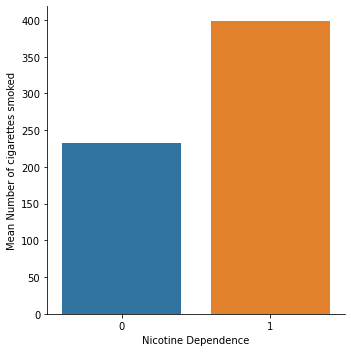

In [12]:
# bivariate bar graph
%matplotlib inline
sns.factorplot(x="TAB12MDX", y="NUMCIGMO_EST", data=sub3, kind="bar", ci=None)
plt.xlabel('Nicotine Dependence')
plt.ylabel('Mean Number of cigarettes smoked')

# Logistical Regression - Example 1

In [14]:
# subset data for logistic regression analyses 18-25, smoked everday in past month)
sub1=nesarc[(nesarc['AGE']>=18) & (nesarc['AGE']<=25) & (nesarc['CHECK321']==1) & (nesarc['S3AQ3B1']==1)]
sub2 = sub1.copy()

In [15]:
# logistic regression with social phobia
lreg1 = smf.logit(formula = 'TAB12MDX ~ SOCPDLIFE', data = sub2).fit()
print (lreg1.summary())

Optimization terminated successfully.
         Current function value: 0.664381
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               TAB12MDX   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1318
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 May 2021   Pseudo R-squ.:                0.009574
Time:                        14:38:12   Log-Likelihood:                -876.98
converged:                       True   LL-Null:                       -885.46
Covariance Type:            nonrobust   LLR p-value:                 3.829e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3776      0.057      6.569      0.000       0.265       0.490
SOCPDLIFE      1.2318      0.

In [16]:
# odd ratios with 95% confidence intervals
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

           Lower CI  Upper CI   OR
Intercept      1.30      1.63 1.46
SOCPDLIFE      1.78      6.61 3.43


# Logistical Regression - Example 2

In [17]:
sub2['MAJORDEPLIFE'] = pd.to_numeric(sub2['MAJORDEPLIFE'], errors='coerce')

In [18]:
# logistic regression with social phobia and depression
lreg2 = smf.logit(formula = 'TAB12MDX ~ SOCPDLIFE + MAJORDEPLIFE', data = sub2).fit()
print (lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.632175
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               TAB12MDX   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1317
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 May 2021   Pseudo R-squ.:                 0.05758
Time:                        14:43:17   Log-Likelihood:                -834.47
converged:                       True   LL-Null:                       -885.46
Covariance Type:            nonrobust   LLR p-value:                 7.177e-23
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0939      0.065      1.444      0.149      -0.034       0.221
SOCPDLIFE        0.8393

In [19]:
# odd ratios with 95% confidence intervals
params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

              Lower CI  Upper CI   OR
Intercept         0.97      1.25 1.10
SOCPDLIFE         1.17      4.57 2.31
MAJORDEPLIFE      2.74      4.98 3.70


# Logistical Regression - Example 3

In [20]:
def PANIC (x1):
    if ((x1['S6Q1']==1 and x1['S6Q2']==1) or (x1['S6Q2']==1 and x1['S6Q3']==1) or 
    (x1['S6Q3']==1 and x1['S6Q61']==1) or (x1['S6Q61']==1 and x1['S6Q62']==1) or 
    (x1['S6Q62']==1 and x1['S6Q63']==1) or (x1['S6Q63']==1 and x1['S6Q64']==1) or 
    (x1['S6Q64']==1 and x1['S6Q65']==1) or (x1['S6Q65']==1 and x1['S6Q66']==1) or 
    (x1['S6Q66']==1 and x1['S6Q67']==1) or (x1['S6Q67']==1 and x1['S6Q68']==1) or 
    (x1['S6Q68']==1 and x1['S6Q69']==1) or (x1['S6Q69']==1 and x1['S6Q610']==1) or 
    (x1['S6Q610']==1 and x1['S6Q611']==1) or (x1['S6Q611']==1 and x1['S6Q612']==1) or 
    (x1['S6Q612']==1 and x1['S6Q613']==1) or (x1['S6Q613']==1 and x1['S6Q7']==1) or 
    x1['S6Q7']==1):
        return 1
    else:
        return 0
sub2['PANIC'] = sub1.apply (lambda x1: PANIC (x1), axis=1)
c7 = sub2["PANIC"].value_counts(sort=False, dropna=False)
print(c7)

0    1201
1     119
Name: PANIC, dtype: int64


In [21]:
# logistic regression with panic
lreg3 = smf.logit(formula = 'TAB12MDX ~ PANIC', data = sub2).fit()
print (lreg3.summary())

Optimization terminated successfully.
         Current function value: 0.668985
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               TAB12MDX   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1318
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 May 2021   Pseudo R-squ.:                0.002709
Time:                        14:46:40   Log-Likelihood:                -883.06
converged:                       True   LL-Null:                       -885.46
Covariance Type:            nonrobust   LLR p-value:                   0.02849
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3895      0.059      6.624      0.000       0.274       0.505
PANIC          0.4458      0.

In [22]:
# odd ratios with 95% confidence intervals
print ("Odds Ratios")
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Odds Ratios
           Lower CI  Upper CI   OR
Intercept      1.32      1.66 1.48
PANIC          1.04      2.35 1.56


# Logistical Regression - Example 4

In [23]:
# logistic regression with panic and depression
lreg4 = smf.logit(formula = 'TAB12MDX ~ PANIC + MAJORDEPLIFE', data = sub2).fit()
print (lreg4.summary())

Optimization terminated successfully.
         Current function value: 0.634684
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               TAB12MDX   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1317
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 May 2021   Pseudo R-squ.:                 0.05384
Time:                        14:48:21   Log-Likelihood:                -837.78
converged:                       True   LL-Null:                       -885.46
Covariance Type:            nonrobust   LLR p-value:                 1.969e-21
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1115      0.066      1.701      0.089      -0.017       0.240
PANIC            0.0478

In [24]:
# odd ratios with 95% confidence intervals
print ("Odds Ratios")
params = lreg4.params
conf = lreg4.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Odds Ratios
              Lower CI  Upper CI   OR
Intercept         0.98      1.27 1.12
PANIC             0.68      1.62 1.05
MAJORDEPLIFE      2.87      5.25 3.88
